In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import sys
sys.path.append('/home/aliche/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as pl
import pickle as pkl
import Recordings
import signale,trajectory
import extras.trees
import os,sys
import fnmatch
import colormaps as cmaps
import seaborn as sns
import scipy.signal as scsig
import seaborn as sns
import random
import pandas as pd
from scipy.io import savemat
from signale.tools import locate
from os import path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
plSpkList = [path.join(spkpth[0],spkpth[1])for spkpth in locate('placeCells.spk','/home/aliche/dataWork/ali/MECLesion_SleepData/')]
lfpList   = [path.join(item[0],item[1])for item in locate('*track.lfp','/home/aliche/dataWork/ali/MECLesion_SleepData/')]
trjList   = [path.join(item[0],item[1])for item in locate('linearTrack_Trajectory.traj','/home/aliche/dataWork/ali/MECLesion_SleepData/')]

In [4]:
len(plSpkList),len(lfpList)

(33, 37)

In [7]:
plSpkList.sort()
lfpList.sort()

In [10]:
for plpath in plSpkList:
    anID    = [item for item in plpath.split('/') if item.find('Rat')>-1][0]
    Dday    = [item for item in plpath.split('/') if item.find('Day')>-1][0]
    lfppath = [item for item in lfpList if (item.find(Dday)>-1 and item.find(anID)>-1)][0]
    trjpath = [item for item in trjList if (item.find(Dday)>-1 and item.find(anID)>-1)][0]
    spk = pd.read_pickle(plpath)
    lfp = pd.read_pickle(lfppath)
    trj = pd.read_pickle(trjpath)
    spk.changeTimeUnit('ms')
    print lfp.timeUnit
    t_i = 1e3*trj.times[0]
    t_f = 1e3*trj.times[-1]
    data = {}
    for cellID in spk.id_list:
        cell = spk[cellID]
        cellTrk = cell.time_slice(t_i,t_f)
        data['unit_'+str(cellID)]=cellTrk.spike_times
        data['trajTimes']=1e3*trj.times
        data['trajCoordinates'] = trj.places
        data['lfpTimes'] = lfp.timeAxis
        data['lfpSignal'] = lfp.signal
        savemat('/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/replay_DataSet/LFP_set/'+anID+'_Day'+Dday[-1]+'.mat',data)

ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms
ms


In [8]:
lfp.times.size,lfp.signal.size

NameError: name 'lfp' is not defined

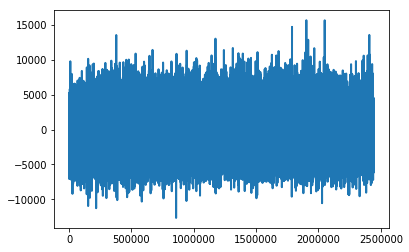

In [51]:
pl.plot(lfp.signal)

In [54]:
trj.times*1e3

array([22399529.868, 22399563.371, 22399596.882, ..., 23599489.625,
       23599523.332, 23599556.715])

In [55]:
lfp.times*1e-3

array([22399614.898, 22399866.556, 22400118.214, ..., 23599018.07 ,
       23599269.728, 23599521.386])

array([ 1170026.2,  1174130. ,  1175044. , ..., 25818034. , 25818120. ,
       25818124. ], dtype=float32)